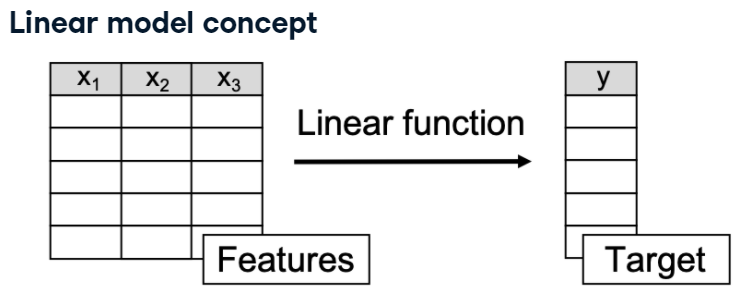

This example goes over how to build a model that derive the linear functions between inputs and variables. And creating these in order to control the "ground truth" that the model tries to derive.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.coef_)  #estimation of the model for coefficients
print(lr.intercept_) #estimation of the model for intercept

*the model object will have .coef_ for coefficient attribute that contains a NumPy array with a number of elements equal to the number of input features*

In [ ]:
#calculate how accurate the model is
#calculating R-squared
print(lr.score(X_test, y_test))

*how much variance in our TARGET the model can predict*

##### What does the Linear Regression Model do?

The model will aim to find **optimal values for the intercept and coefficients** by minimizing a loss function.

- the loss function contains the SUM OF SQUARED DIFFERENCES (MSE) between ACTUAL and PREDICTED values.
- minimizing MSE makes the model as accurate as possible
- the key is not to have is "super accurate" (aka: overfitting) : this woud essence make the model generalize very well to the training dataset, but no longer generalize as well to the new data.

**To establish this, need to perform REGULARIZATION**

This is called **LASSO REGULARIZATION** for least absolute shrinkage

- 1 - Model will minimize MSE 
- 2 - AND keep the model simple by keeping the coefficients low

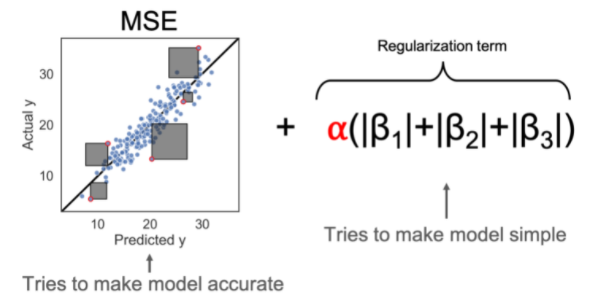

#### ALPHA

- TOO LOW: model might overfit
- TOO HIGH: model might become too simple and inacurate

In [ ]:
from sklearn.linear_model import Lasso

la = Lasso()  #la=Lasso(alpha=0.5) might reduce the coefficients of the other features
la.fit(X_train, y_train)

print(la.coef_)
print(la.score(X_test, y_test))  #this will indicate what changes the model performed to 
#reduce the least coefficient to zero possibly

Example use-case

In [ ]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

#### Combining Feature Selectors

 #### || LassoCV Regressor

Because manually finding a good alpha value can be tedious, there is a way to automate this by using the LassoCV(cross-validation) Regressor

- it will use a cross validation to try out different alpha settings and selecting the best one
- the result will provide an "alpha_attribute" with optimal value

In [ ]:
from sklearn.linear_model import LassoCV

lcv = LassoCV()
lcv.fit(X_train, y_train)

print(lcv.alpha_)

In [ ]:
#create a mask for all nonzero coefficients
mask = lcv.coef_ !=0
print(mask)
sum(mask) #how many features dont have a coefficient of zero

In [ ]:
#apply to dataset
reduced_X = X.loc[:, mask]

 #### || Random Forest Regressor

In [ ]:
from sklearn.feature_selectoin import RFE
from sklearn.ensemble import RandomForestRegressor

rfe_rf = RFE(estimator=RandomForestRegressor(),
            n_features_to_select=66,
            step=5,
            verbose=1)

rfe_rf.fit(X_train, y_train)
rf_mask = rfe_rf.support_

 #### || Gradient Boosting Regressor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

rfe_gb = RFE(estimator=GradientBoostingRegressor(),
             n_features_to_select=66,
             step=5,
             verbose=1)
rfe_gb.fit(X_train, y_train)
gb_mask = rfe_gb.support_

Combining the Feature Selectors

In [ ]:
import numpy as np
votes = np.sum([lcv_mas, rf_mask, gb_mask], axis=0)

print(votes)  #votes for each feature

In [ ]:
#select for features where there is at least 2 votes
mask = votes >= 2

In [ ]:
reduced_X = X.loc[:, mask]